<a href="https://colab.research.google.com/github/batmanvane/complex-systems-modeling/blob/main/miniprojects/03StructuralReliability/structural_reliability_intro.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# Introduction to Structural Reliability for Mechanical Engineering

**Course:** Complex Systems Modeling  
**Institution:** Technische Hochschule Brandenburg  
**Topic:** Probabilistic Assessment of Structural Safety

---

## 1. Motivation: Why Do We Need Reliability Analysis?

### 1.1 The Deterministic Approach - Is It Sufficient?

Traditional engineering design uses **safety factors** to account for uncertainties:

$$\text{Design Criterion: } \frac{R}{S} \geq \text{Safety Factor}$$

where:
- $R$ = Resistance (strength, capacity)
- $S$ = Load (stress, demand)

**Problems with this approach:**

1. **Arbitrary safety factors** - Why 1.5? Why not 2.0 or 1.2?
2. **No quantification of actual risk** - What is the probability of failure?
3. **Ignores variability** - Real materials and loads are random!
4. **Cannot optimize** - Is the design too conservative (expensive) or too risky?

### 1.2 Real-World Examples

**Case 1: Aircraft Structures**
- Material strength varies (manufacturing, defects)
- Flight loads are uncertain (turbulence, maneuvers)
- *Question:* How do we ensure 1 in 10⁹ flight hours failure rate?

**Case 2: Pressure Vessels**
- Wall thickness varies (±2% tolerance)
- Operating pressure fluctuates
- Material properties change with temperature
- *Question:* What is the actual probability of burst?

**Case 3: Bridge Design**
- Traffic loads are random
- Concrete strength has spatial variability
- Environmental degradation over time
- *Question:* Will it survive 100 years?

### 1.3 The Reliability Approach

**Structural Reliability** provides:
- Quantitative measure of safety: $P_f$ (probability of failure)
- Rational basis for design decisions
- Optimization of cost vs. risk
- Comparison of different designs on equal footing

---

## 2. Fundamental Concepts

### 2.1 Random Variables in Engineering

Most engineering quantities are **random variables** with:
- Mean value: $\mu$
- Standard deviation: $\sigma$
- Coefficient of variation: $\text{CoV} = \sigma/\mu$

**Typical CoV values in mechanical engineering:**
- Steel yield strength: 6-8%
- Concrete strength: 15-20%
- Dead loads: 5-10%
- Live loads: 20-30%
- Wind loads: 30-40%

### 2.2 The Limit State Function

Define a **performance function** (or limit state function):

$$g(R, S) = R - S$$

- $g > 0$: Safe state
- $g = 0$: Limit state (boundary)
- $g < 0$: Failure state

### 2.3 Probability of Failure

$$P_f = P(g < 0) = P(R < S)$$

This is the fundamental quantity we want to compute!

### 2.4 Reliability Index

The **reliability index** $\beta$ is defined as:

$$\beta = \Phi^{-1}(1 - P_f)$$

where $\Phi$ is the standard normal CDF.

**Interpretation:**
- $\beta = 3.0 \Rightarrow P_f \approx 1.35 \times 10^{-3}$
- $\beta = 4.0 \Rightarrow P_f \approx 3.17 \times 10^{-5}$
- $\beta = 5.0 \Rightarrow P_f \approx 2.87 \times 10^{-7}$

---

## 3. Simple Analytical Example

Consider a tension member where both resistance $R$ and load $S$ are **normally distributed**:

- $R \sim N(\mu_R, \sigma_R)$
- $S \sim N(\mu_S, \sigma_S)$

The margin $M = R - S$ is also normal:

$$M \sim N(\mu_R - \mu_S, \sqrt{\sigma_R^2 + \sigma_S^2})$$

The probability of failure is:

$$P_f = \Phi\left(-\frac{\mu_R - \mu_S}{\sqrt{\sigma_R^2 + \sigma_S^2}}\right)$$

The reliability index:

$$\beta = \frac{\mu_R - \mu_S}{\sqrt{\sigma_R^2 + \sigma_S^2}}$$

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 5)

# Define resistance and load parameters
mu_R = 250  # MPa - mean resistance
sigma_R = 25  # MPa - std dev of resistance (CoV = 10%)

mu_S = 150  # MPa - mean load
sigma_S = 30  # MPa - std dev of load (CoV = 20%)

# Create distributions
R = stats.norm(mu_R, sigma_R)
S = stats.norm(mu_S, sigma_S)

# Calculate reliability index
beta = (mu_R - mu_S) / np.sqrt(sigma_R**2 + sigma_S**2)
Pf = stats.norm.cdf(-beta)

print(f"Reliability Analysis Results:")
print(f"="*50)
print(f"Mean Resistance: {mu_R} MPa")
print(f"Mean Load: {mu_S} MPa")
print(f"Safety Margin (mean): {mu_R - mu_S} MPa")
print(f"")
print(f"Reliability Index β: {beta:.3f}")
print(f"Probability of Failure Pf: {Pf:.6e}")
print(f"Reliability: {(1-Pf)*100:.4f}%")

Reliability Analysis Results:
Mean Resistance: 250 MPa
Mean Load: 150 MPa
Safety Margin (mean): 100 MPa

Reliability Index β: 2.561
Probability of Failure Pf: 5.222511e-03
Reliability: 99.4777%


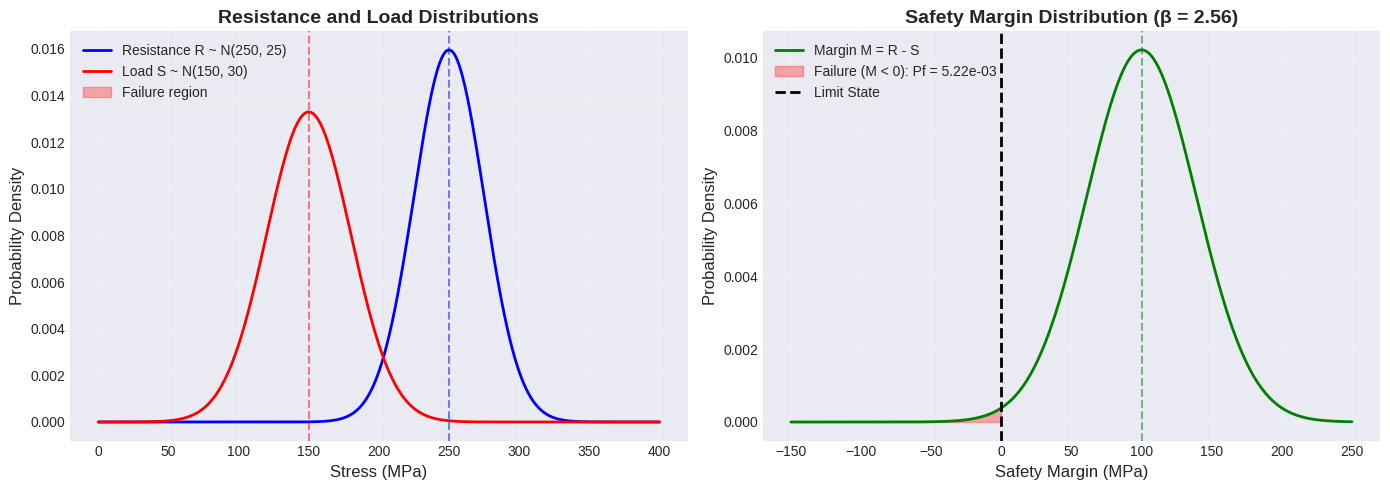

In [14]:
# Visualization
x = np.linspace(0, 400, 1000)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: PDF of R and S
ax1.plot(x, R.pdf(x), 'b-', linewidth=2, label=f'Resistance R ~ N({mu_R}, {sigma_R})')
ax1.plot(x, S.pdf(x), 'r-', linewidth=2, label=f'Load S ~ N({mu_S}, {sigma_S})')
ax1.fill_between(x, 0, R.pdf(x), where=(x > 0) & (x < mu_S), alpha=0.3, color='red', label='Failure region')
ax1.axvline(mu_R, color='b', linestyle='--', alpha=0.5)
ax1.axvline(mu_S, color='r', linestyle='--', alpha=0.5)
ax1.set_xlabel('Stress (MPa)', fontsize=12)
ax1.set_ylabel('Probability Density', fontsize=12)
ax1.set_title('Resistance and Load Distributions', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Plot 2: Safety Margin Distribution
M_mean = mu_R - mu_S
M_std = np.sqrt(sigma_R**2 + sigma_S**2)
M = stats.norm(M_mean, M_std)

x_margin = np.linspace(-150, 250, 1000)
ax2.plot(x_margin, M.pdf(x_margin), 'g-', linewidth=2, label=f'Margin M = R - S')
ax2.fill_between(x_margin, 0, M.pdf(x_margin), where=x_margin < 0, alpha=0.3, color='red',
                  label=f'Failure (M < 0): Pf = {Pf:.2e}')
ax2.axvline(0, color='k', linestyle='--', linewidth=2, label='Limit State')
ax2.axvline(M_mean, color='g', linestyle='--', alpha=0.5)
ax2.set_xlabel('Safety Margin (MPa)', fontsize=12)
ax2.set_ylabel('Probability Density', fontsize=12)
ax2.set_title(f'Safety Margin Distribution (β = {beta:.2f})', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Key Observations:

1. Even though $\mu_R > \mu_S$ (mean resistance exceeds mean load), **failure is still possible** due to variability
2. The failure probability depends on the **overlap** between the two distributions
3. Higher variability (larger $\sigma$) → higher probability of failure
4. The reliability index $\beta$ measures "how many standard deviations" separate us from failure

---

## 4. Monte Carlo Simulation Approach

For complex problems, we use **Monte Carlo simulation**:

1. Generate random samples of $R$ and $S$
2. Evaluate $g = R - S$ for each sample
3. Count how many times $g < 0$
4. Estimate $P_f = \frac{\text{Number of failures}}{\text{Total samples}}$

**Advantages:**
- Works for any distribution
- Can handle multiple random variables
- Easy to implement

**Disadvantages:**
- Requires many samples for rare events
- Computationally expensive for complex models

In [15]:
# Monte Carlo Simulation
np.random.seed(42)

n_samples = 100000

# Generate random samples
R_samples = np.random.normal(mu_R, sigma_R, n_samples)
S_samples = np.random.normal(mu_S, sigma_S, n_samples)

# Evaluate limit state function
g_samples = R_samples - S_samples

# Count failures
n_failures = np.sum(g_samples < 0)
Pf_MC = n_failures / n_samples

print(f"Monte Carlo Simulation Results:")
print(f"="*50)
print(f"Number of samples: {n_samples:,}")
print(f"Number of failures: {n_failures}")
print(f"Pf (Monte Carlo): {Pf_MC:.6e}")
print(f"Pf (Analytical): {Pf:.6e}")
print(f"Relative error: {abs(Pf_MC - Pf)/Pf * 100:.2f}%")

Monte Carlo Simulation Results:
Number of samples: 100,000
Number of failures: 488
Pf (Monte Carlo): 4.880000e-03
Pf (Analytical): 5.222511e-03
Relative error: 6.56%


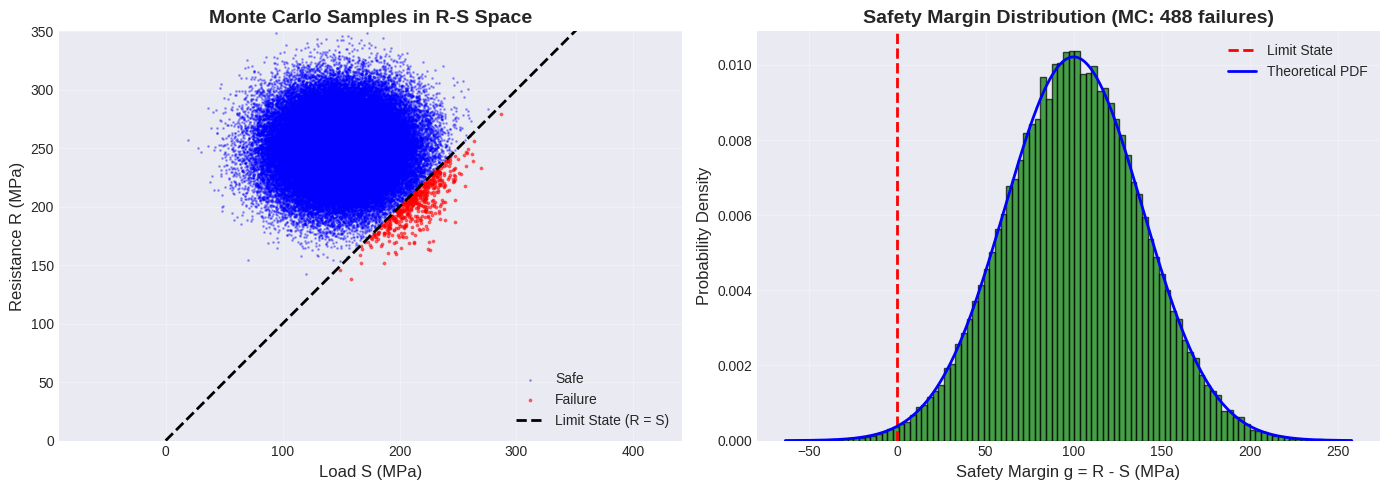

In [16]:
# Visualize Monte Carlo samples
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Scatter plot of R vs S
failure_mask = g_samples < 0
ax1.scatter(S_samples[~failure_mask], R_samples[~failure_mask], alpha=0.3, s=1,
            c='blue', label='Safe')
ax1.scatter(S_samples[failure_mask], R_samples[failure_mask], alpha=0.5, s=3,
            c='red', label='Failure')
ax1.plot([0, 400], [0, 400], 'k--', linewidth=2, label='Limit State (R = S)')
ax1.set_xlabel('Load S (MPa)', fontsize=12)
ax1.set_ylabel('Resistance R (MPa)', fontsize=12)
ax1.set_title('Monte Carlo Samples in R-S Space', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.axis('equal')
ax1.set_xlim(0, 350)
ax1.set_ylim(0, 350)

# Plot 2: Histogram of safety margin
ax2.hist(g_samples, bins=100, density=True, alpha=0.7, color='green', edgecolor='black')
ax2.axvline(0, color='red', linestyle='--', linewidth=2, label='Limit State')
x_hist = np.linspace(g_samples.min(), g_samples.max(), 1000)
ax2.plot(x_hist, M.pdf(x_hist), 'b-', linewidth=2, label='Theoretical PDF')
ax2.set_xlabel('Safety Margin g = R - S (MPa)', fontsize=12)
ax2.set_ylabel('Probability Density', fontsize=12)
ax2.set_title(f'Safety Margin Distribution (MC: {n_failures} failures)', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---

## 5. Effect of Design Parameters

Let's explore how changing design parameters affects reliability:

/tmp/ipython-input-2815921161.py:34: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


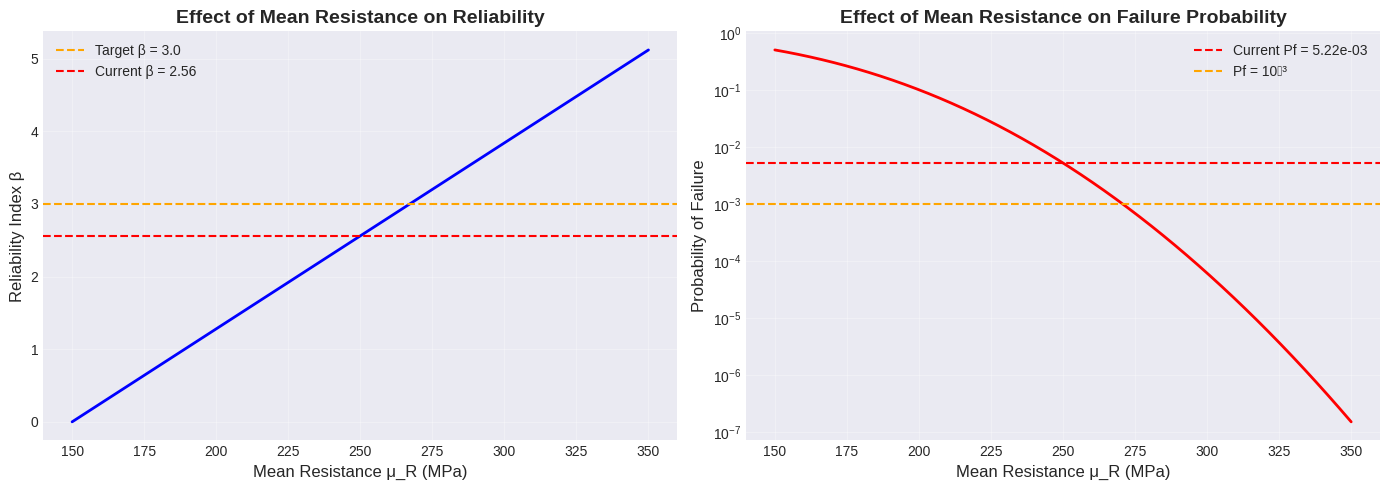

In [17]:
# Sensitivity analysis: Effect of mean resistance
mu_R_range = np.linspace(150, 350, 50)
beta_values = []
Pf_values = []

for mu_R_test in mu_R_range:
    beta_test = (mu_R_test - mu_S) / np.sqrt(sigma_R**2 + sigma_S**2)
    Pf_test = stats.norm.cdf(-beta_test)
    beta_values.append(beta_test)
    Pf_values.append(Pf_test)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot reliability index
ax1.plot(mu_R_range, beta_values, 'b-', linewidth=2)
ax1.axhline(3.0, color='orange', linestyle='--', label='Target β = 3.0')
ax1.axhline(beta, color='red', linestyle='--', label=f'Current β = {beta:.2f}')
ax1.set_xlabel('Mean Resistance μ_R (MPa)', fontsize=12)
ax1.set_ylabel('Reliability Index β', fontsize=12)
ax1.set_title('Effect of Mean Resistance on Reliability', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Plot probability of failure
ax2.semilogy(mu_R_range, Pf_values, 'r-', linewidth=2)
ax2.axhline(Pf, color='red', linestyle='--', label=f'Current Pf = {Pf:.2e}')
ax2.axhline(1e-3, color='orange', linestyle='--', label='Pf = 10⁻³')
ax2.set_xlabel('Mean Resistance μ_R (MPa)', fontsize=12)
ax2.set_ylabel('Probability of Failure', fontsize=12)
ax2.set_title('Effect of Mean Resistance on Failure Probability', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---

## 6. Target Reliability Levels

Different applications require different reliability levels:

| Application | Target β | Target Pf | Consequence of Failure |
|------------|----------|-----------|------------------------|
| Reusable spacecraft | 5.0-6.0 | 10⁻⁷-10⁻⁹ | Catastrophic, loss of life |
| Aircraft structures | 4.0-5.0 | 10⁻⁵-10⁻⁷ | Loss of life, high economic loss |
| Pressure vessels | 3.5-4.5 | 10⁻⁴-10⁻⁶ | Potential loss of life |
| Building structures | 3.0-3.5 | 10⁻³-10⁻⁴ | Economic loss, repairable |
| Machine components | 2.5-3.0 | 10⁻²-10⁻³ | Local failure, replaceable |

**Key insight:** The target reliability should be chosen based on:
1. Consequence of failure (safety, economic, environmental)
2. Cost of increasing reliability
3. Societal acceptance of risk

---

## 7. Exercise for Students

### Problem Statement: Design of a Cantilever Beam

A cantilever beam of length $L = 2$ m carries a concentrated load $P$ at the free end. The maximum bending stress is:

$$\sigma = \frac{M_{max}}{W} = \frac{P \cdot L}{W}$$

where $W$ is the section modulus. For a rectangular cross-section with width $b$ and height $h$:

$$W = \frac{b h^2}{6}$$

**Given data:**
- Material: Structural steel
  - Yield strength: $S_y \sim N(\mu = 250 \text{ MPa}, \sigma = 25 \text{ MPa})$
- Load:
  - Applied force: $P \sim N(\mu = 10 \text{ kN}, \sigma = 2 \text{ kN})$
- Geometry:
  - Width: $b = 50$ mm (deterministic)
  - Height: $h \sim N(\mu = 100 \text{ mm}, \sigma = 2 \text{ mm})$ (manufacturing tolerance)
  - Length: $L = 2$ m (deterministic)

**Tasks:**

1. **Define the limit state function** $g$ for this problem
2. **Calculate the reliability index** $\beta$ using Monte Carlo simulation
3. **Determine if the design is acceptable** for a machine component (target $\beta \geq 2.5$)
4. **Perform sensitivity analysis**: Which parameter has the most influence on reliability?
5. **Propose design modifications** to achieve $\beta = 3.0$ if needed

### Solution Template

In [18]:
# Exercise Solution Template
# Students should complete this code

# Given parameters
L = 2.0  # m - beam length
b = 0.050  # m - beam width

# Random variable parameters
mu_Sy = 250e6  # Pa - mean yield strength
sigma_Sy = 25e6  # Pa

mu_P = 10e3  # N - mean load
sigma_P = 2e3  # N

mu_h = 0.100  # m - mean height
sigma_h = 0.002  # m

# TODO for students:
# 1. Write the limit state function g(Sy, P, h)
# 2. Generate random samples (n = 100,000)
# 3. Calculate reliability index
# 4. Create visualizations
# 5. Perform sensitivity analysis

# Hint for limit state function:
# g = Sy - sigma_applied
# where sigma_applied = M / W = (P * L) / (b * h^2 / 6)

# YOUR CODE HERE
n_samples = 100000
np.random.seed(42)

# Generate samples
# Sy_samples = ...
# P_samples = ...
# h_samples = ...

# Calculate section modulus
# W_samples = ...

# Calculate bending moment
# M_samples = ...

# Calculate applied stress
# sigma_applied = ...

# Evaluate limit state
# g_samples = ...

# Calculate Pf and beta
# Pf = ...
# beta = ...

print("Solution will be provided here...")
print("Students: Complete the code above!")

Solution will be provided here...
Students: Complete the code above!


### Hints for Students:

1. The limit state function should be: $g = S_y - \sigma_{applied}$
2. Remember to convert all units consistently (Pa, N, m)
3. The section modulus $W$ is also random because $h$ is random
4. For sensitivity analysis, vary each parameter one at a time and observe $\beta$
5. To increase reliability, you can:
   - Increase mean beam height $\mu_h$
   - Reduce variability (tighter tolerances)
   - Use stronger material

### Expected Results:
- You should find $\beta \approx 2.0-2.5$ for the original design
- The most sensitive parameter is likely the beam height $h$
- Increasing $\mu_h$ by 10-20% should achieve $\beta = 3.0$

---

## 8. Discussion Questions

1. **Why is the coefficient of variation (CoV) important in reliability analysis?**

2. **What are the limitations of using safety factors compared to reliability analysis?**

3. **In the cantilever beam problem, which random variable do you think has the most impact on reliability? Why?**

4. **How many Monte Carlo samples are needed for accurate estimation of:**
   - $P_f = 10^{-2}$?
   - $P_f = 10^{-6}$?

5. **What are practical ways to reduce the probability of failure in engineering design?**

6. **How would you incorporate time-dependent effects (fatigue, corrosion) into reliability analysis?**

---

## 9. Further Reading and Resources

**Books:**
- Melchers, R.E., & Beck, A.T. (2018). *Structural Reliability Analysis and Prediction*, 3rd ed.
- Haldar, A., & Mahadevan, S. (2000). *Probability, Reliability and Statistical Methods in Engineering Design*
- Nowak, A.S., & Collins, K.R. (2012). *Reliability of Structures*, 2nd ed.

**Topics for Advanced Study:**
- First-Order Reliability Method (FORM)
- Second-Order Reliability Method (SORM)
- Importance sampling for rare events
- System reliability
- Time-dependent reliability
- Reliability-based design optimization (RBDO)

**Software Tools:**
- OpenTURNS (Python library for uncertainty quantification)
- UQLab (MATLAB toolbox)
- FERUM (Finite Element Reliability Using Matlab)

---

## Summary

**Key Takeaways:**

1. Real engineering systems have **inherent uncertainties** that must be quantified
2. **Reliability analysis** provides a rational framework for safety assessment
3. The **reliability index** $\beta$ is a normalized measure of safety
4. **Monte Carlo simulation** is a versatile tool for complex reliability problems
5. Design decisions should balance **cost vs. risk** based on target reliability levels
6. Understanding **variability** is crucial for robust design

**Next steps:** Apply these concepts to your course projects and real engineering problems!

---

*Notebook created for Safety and Reliability course*
*University of Applied Sciences*
*// Robert Flassig*
*// Codeassist: Githubpilot + Claude Sonet 4.5*
*// Last Update: 9/12/2025*